# Task 1. Student Marks Prediction 

## Model to predict the marks of the students using regression model.

About dataset:

1st column: The number of courses they have opted for

2nd column: The average time studied per day by students

3rd column: Marks obtained by students


In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Importing the dataset and displacing the first five lines of the dataset

df = pd.read_csv("Student_Marks.csv")
print(df.head())

   number_courses  time_study   Marks
0               3       4.508  19.202
1               4       0.096   7.734
2               4       3.133  13.811
3               6       7.909  53.018
4               8       7.811  55.299


In [3]:
# Shape of the data

df.shape

(100, 3)

In [4]:
# Statistical values

df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [5]:
# checking for the null values

df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [6]:
# Displacing the value count of each attribute

df.value_counts()

number_courses  time_study  Marks 
3               0.301       5.609     1
6               6.594       39.965    1
7               2.913       18.238    1
                0.508       12.647    1
                0.423       12.132    1
                                     ..
4               3.133       13.811    1
                2.966       13.119    1
                2.438       10.844    1
                1.954       9.742     1
8               7.811       55.299    1
Length: 100, dtype: int64

Text(0.5, 1.0, 'Time Spent and Marks Scored')

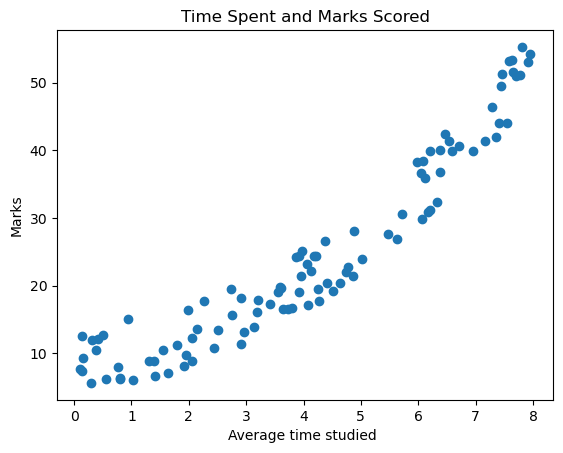

In [7]:
# Plotting

plt.scatter(df.time_study,df.Marks)
plt.xlabel('Average time studied ')
plt.ylabel('Marks')
plt.title('Time Spent and Marks Scored')

Marks             1.000000
time_study        0.942254
number_courses    0.417335
Name: Marks, dtype: float64


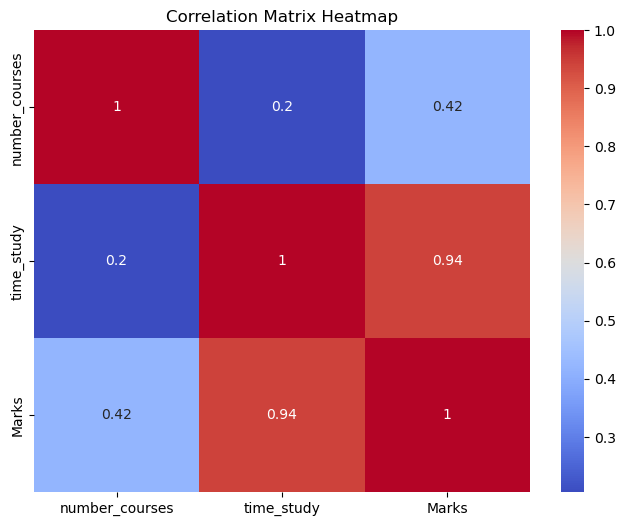

In [8]:
# Finding the correlation and plotting

correlation = df.corr()
print(correlation["Marks"].sort_values(ascending=False))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
# independent and dependent variables
x = np.array(df[["time_study", "number_courses"]])
y = np.array(df["Marks"])

In [10]:
# Splitting the dataset into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

## Model Building

In [11]:
lr=LinearRegression()

In [12]:
#train the model
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
# test the model
y_pred=lr.predict(x_test)

In [14]:
y_pred

array([ 8.53602   , 27.7351677 , 17.26125916, 21.50987508,  2.88018967,
       42.51543273, 33.02332944,  7.33607503, 48.55731119, 23.19372884,
       38.42713475, 27.47850719, 45.99027189, 21.60461834, 20.58353326,
       28.45188172, 13.2361775 , 19.96931539, 39.55535147, 24.1500795 ])

In [15]:
#Error
E=y_test-y_pred
E

array([ 4.11098   , -4.5861677 , -3.45025916, -3.27187508,  3.33681033,
       -0.08943273, -2.47532944, -0.32207503,  4.60068881, -4.06572884,
       -1.77413475, -3.56250719,  3.55372811, -3.93261834, -3.31953326,
       -4.27988172, -1.0271775 , -3.45231539,  0.40964853, -3.8020795 ])

In [16]:
# Accuracy

from sklearn.metrics import r2_score
print("accuracy:",r2_score(y_pred,y_test)*100)

accuracy: 93.06230487123403


In [17]:
# Predict with random values
y_pr=lr.predict([[3,2.913 ]])
y_pr

array([14.57435461])